Earthquake prediction 
Dataset: https://github.com/amankharwal/Website-data/blob/master/database.csv

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV

In [4]:
data=pd.read_csv('database.csv')
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
data=data[['Date','Time',"Latitude",'Longitude',"Depth","Magnitude"]]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [17]:
import datetime
import time 

timestamp =[]

for d,t in zip(data['Date'],data['Time']):
    try:
        ts=datetime.datetime.strptime(d+' '+t,'%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        timestamp.append("ValueError")

timeStamp=pd.Series(timestamp)
data['Timestamp']=timeStamp.values
final_data=data.drop(["Date",'Time'], axis=1)
final_data=final_data[final_data.Timestamp !='ValueError']
final_data.head()

OverflowError: mktime argument out of range

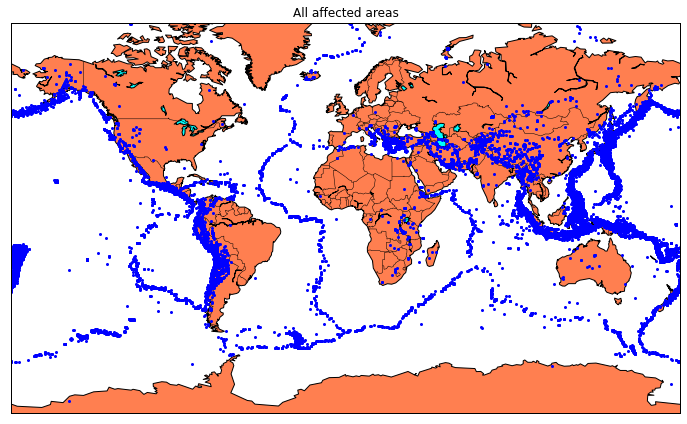

In [7]:
from mpl_toolkits.basemap import Basemap

m=Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes=data['Longitude'].tolist()
latitudes=data['Latitude'].tolist()

x,y=m(longitudes,latitudes)

fig=plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x,y,'o',markersize=2,color='blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [10]:
X=final_data[['Timestamp','Latitude',"Longitude"]]
y=final_data[["Magnitude",'Depth']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [19]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons,activation,optimizer,loss):
    model=Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

TypeError: register_loss_scale_wrapper() takes 2 positional arguments but 3 were given

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier

model=KerasClassifier(build_fn=create_model,verbose=0)

neurons=[16]
batch_size=[10]
epochs=[10]
activation=['sigmoid','relu']
optimizer=['SGD','Adadelta']
loss=['squared_hinge']

param_grid=dict(neurons=neurons,batch_size=batch_size,epochs=epochs,activation=activation,optimizer=optimizer,loss=loss)

TypeError: register_loss_scale_wrapper() takes 2 positional arguments but 3 were given

In [22]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1)
grid_result=grid.fit(X_train,y_train)

print(f"Best:{grid_result.best_score_,} using {grid_result.best_params_}")
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print(f'{mean} ({stdev}) with: {param}')

NameError: name 'model' is not defined

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
